<a href="https://colab.research.google.com/github/mhkirali/numpy_test1/blob/main/fair_value_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 27488.1680 - val_loss: 33558.6250
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 24616.4668 - val_loss: 27268.5918
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 16833.7812 - val_loss: 14451.0156
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 6152.1523 - val_loss: 2730.1060
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 629.6288 - val_loss: 93.8048
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 97.9813 - val_loss: 45.0792
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 94.5405 - val_loss: 49.3727
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 92.8389 - val_loss: 47.8818
Epoch 9/100
44/44 [==============================] - 0s 3ms/step - loss: 91.0116 - val_loss: 47.1800

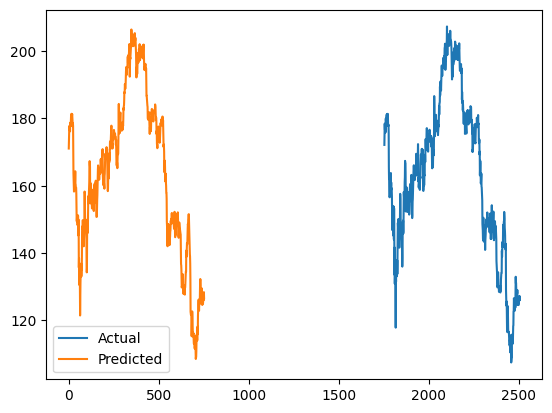

The fair value of MMM stock is $163.05.


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

# Load the data
df = yf.download('MMM', start='2013-01-01', end='2022-12-15')
df = df.reset_index()

# Create the features and target
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df['Close']

# Normalize the features
features = features / features.max()

# Split the data into train and test sets
train_features = features[:int(0.7 * len(features))]
train_target = target[:int(0.7 * len(target))]
test_features = features[int(0.7 * len(features)):]
test_target = target[int(0.7 * len(target)):]

# Create the model
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_features, train_target, epochs=100, validation_split=0.2)

# Evaluate the model
model.evaluate(test_features, test_target)

# Make predictions
predictions = model.predict(test_features)

# Plot the predictions
plt.plot(test_target, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

# Calculate the fair value
fair_value = np.mean(predictions)

# Print the fair value
print('The fair value of MMM stock is ${:.2f}.'.format(fair_value))

In [3]:
# Print error
print("Train error: ",)
print("Test error: ",)

SyntaxError: ignored

In [4]:
print("Train error: ", end="")
print("Test error: ", end="")

Train error: Test error: 